In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('titanic.csv')

In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


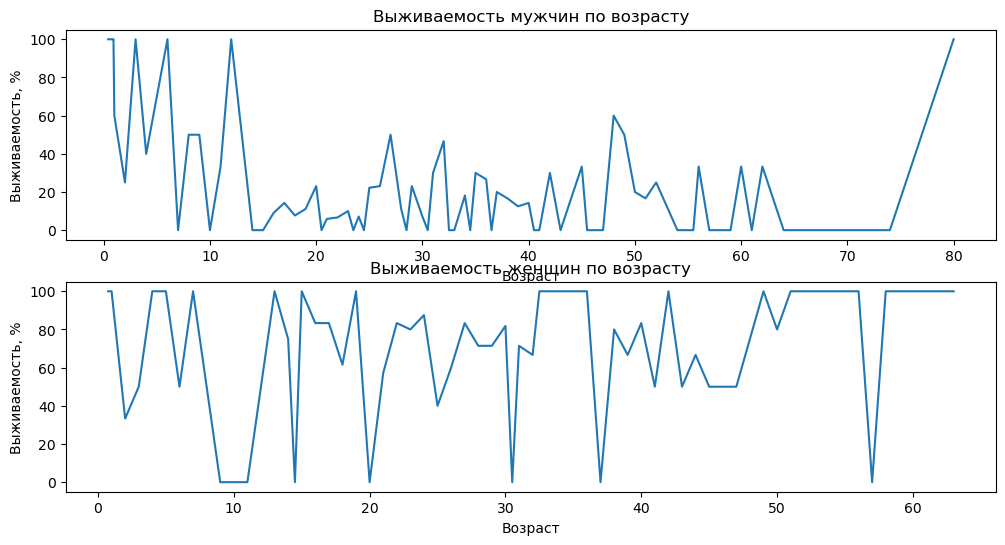

In [8]:
survived_by_age_sex = data.groupby(['Age', 'Sex'])['Survived'].agg(['sum', 'count'])
survived_by_age_sex = survived_by_age_sex.reset_index()

# добавляем столбец с процентом выживших
survived_by_age_sex['Survival Rate'] = survived_by_age_sex['sum'] / survived_by_age_sex['count'] * 100

# отделяем данные по мужчинам и женщинам
survived_male = survived_by_age_sex[survived_by_age_sex['Sex'] == 'male']
survived_female = survived_by_age_sex[survived_by_age_sex['Sex'] == 'female']

# строим графики
fig, axs = plt.subplots(2, 1, figsize=(12, 6))

axs[0].plot(survived_male['Age'], survived_male['Survival Rate'])
axs[0].set_title('Выживаемость мужчин по возрасту')
axs[0].set_xlabel('Возраст')
axs[0].set_ylabel('Выживаемость, %')

axs[1].plot(survived_female['Age'], survived_female['Survival Rate'])
axs[1].set_title('Выживаемость женщин по возрасту')
axs[1].set_xlabel('Возраст')
axs[1].set_ylabel('Выживаемость, %')

plt.show()

In [9]:
import seaborn as sns

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Survival Rate'>

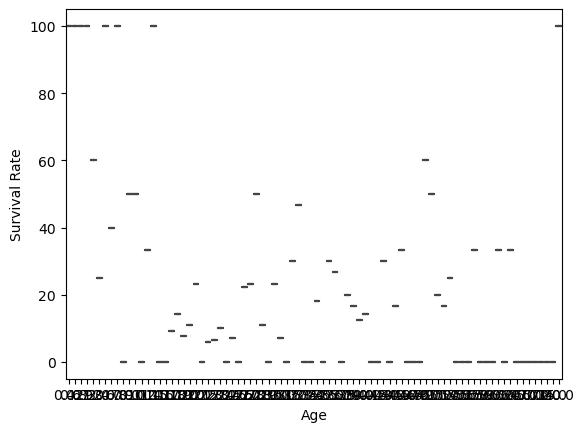

In [11]:
sns.boxplot(survived_male['Age'], survived_male['Survival Rate'])

In [12]:
data_age = data[['Sex', 'Age', 'Survived']]

# Создаем столбец 'Age Group' с помощью pd.cut
data_age['Age Group'] = pd.cut(data_age['Age'], bins=range(0, 100, 10))

# Группируем данные по полу и возрастной группе
data_group = data_age.groupby(['Sex', 'Age Group']).agg({'Survived': ['count', 'sum']})

# Переименовываем столбцы
data_group.columns = ['Passengers', 'Survived']

# Преобразуем индекс в столбцы
data_group = data_group.reset_index()

C:\Users\User\AppData\Local\Temp\ipykernel_17364\2219155058.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_age['Age Group'] = pd.cut(data_age['Age'], bins=range(0, 100, 10))


In [16]:
data_group


,Sex,Age Group,Passengers,Survived
0,female,"(0, 10]",31,19
1,female,"(10, 20]",46,34
2,female,"(20, 30]",81,61
3,female,"(30, 40]",55,46
4,female,"(40, 50]",31,21
5,female,"(50, 60]",14,13
6,female,"(60, 70]",3,3
7,female,"(70, 80]",0,0
8,female,"(80, 90]",0,0
9,male,"(0, 10]",33,19


In [24]:
data_group['Age Group'] = data_group['Age Group'].astype(str)

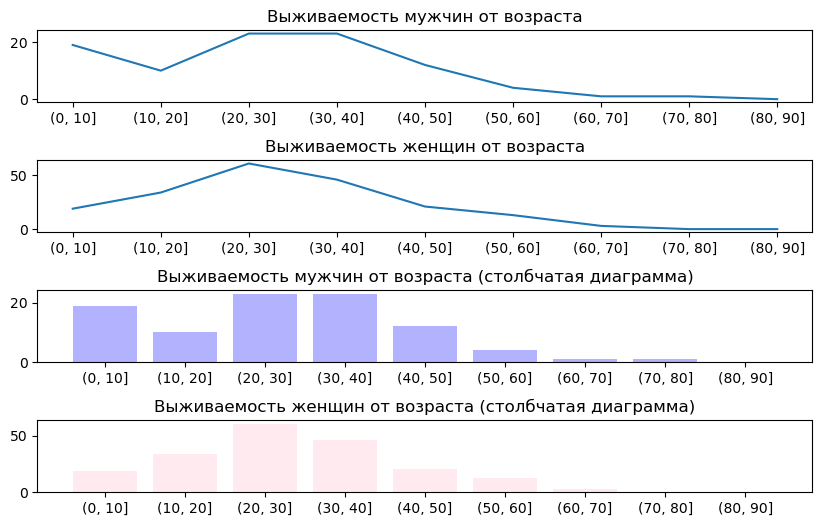

In [34]:
fig, ax = plt.subplots(4,1,figsize=(10, 6))

# график для мужчин
ax[0].plot(data_group[data_group['Sex'] == 'male']["Age Group"], data_group[data_group['Sex'] == 'male']['Survived'], label='Male')
ax[0].set_title("Выживаемость мужчин от возраста")
# график для женщин
ax[1].plot(data_group[data_group['Sex'] == 'female']["Age Group"], data_group[data_group['Sex'] == 'female']['Survived'], label='Female')
ax[1].set_title("Выживаемость женщин от возраста")
# столбчатая диаграмма для мужчин
ax[2].bar(data_group[data_group['Sex'] == 'male']["Age Group"], data_group[data_group['Sex'] == 'male']['Survived'], alpha=0.3, label='Male', color='blue')
ax[2].set_title("Выживаемость мужчин от возраста (столбчатая диаграмма)")
# столбчатая диаграмма для женщин
ax[3].bar(data_group[data_group['Sex'] == 'female']["Age Group"], data_group[data_group['Sex'] == 'female']['Survived'], alpha=0.3, label='Female', color='pink')
ax[3].set_title("Выживаемость женщин от возраста (столбчатая диаграмма)")


plt.subplots_adjust(hspace=0.8)
# выводим график
plt.show()

In [20]:
data_group[data_group['Sex'] == 'male'].index

Int64Index([9, 10, 11, 12, 13, 14, 15, 16, 17], dtype='int64')

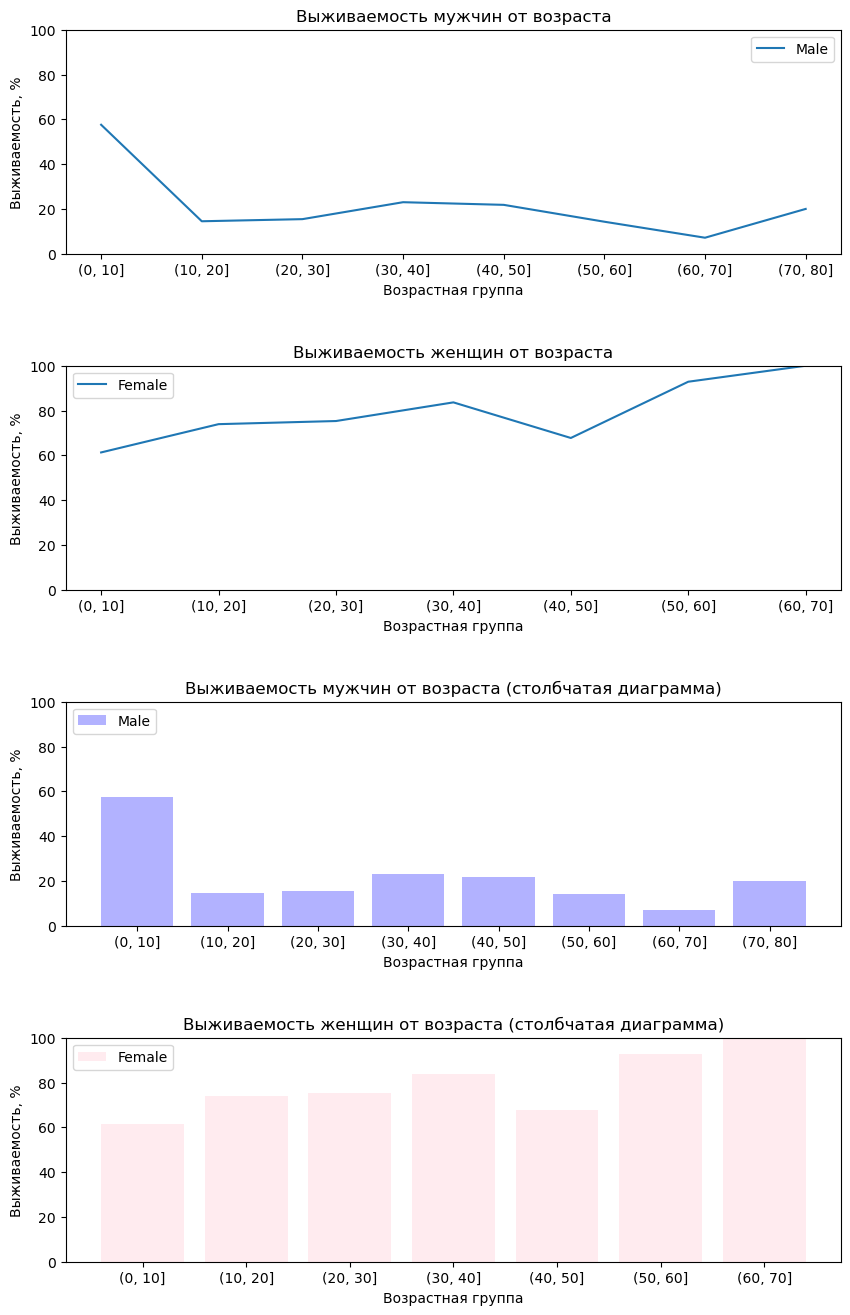

In [41]:
fig, ax = plt.subplots(4,1,figsize=(10, 16))

# график для мужчин
ax[0].plot(data_group[data_group['Sex'] == 'male']["Age Group"], data_group[data_group['Sex'] == 'male']['Survived']/data_group[data_group['Sex'] == 'male']['Passengers']*100, label='Male')
ax[0].set_xlabel('Возрастная группа')
ax[0].set_ylabel('Выживаемость, %')
ax[0].set_title('Выживаемость мужчин от возраста')

# график для женщин
ax[1].plot(data_group[data_group['Sex'] == 'female']["Age Group"], data_group[data_group['Sex'] == 'female']['Survived']/data_group[data_group['Sex'] == 'female']['Passengers']*100, label='Female')
ax[1].set_xlabel('Возрастная группа')
ax[1].set_ylabel('Выживаемость, %')
ax[1].set_title('Выживаемость женщин от возраста')

# столбчатая диаграмма для мужчин
ax[2].bar(data_group[data_group['Sex'] == 'male']["Age Group"], data_group[data_group['Sex'] == 'male']['Survived']/data_group[data_group['Sex'] == 'male']['Passengers']*100, alpha=0.3, label='Male', color='blue')
ax[2].set_xlabel('Возрастная группа')
ax[2].set_ylabel('Выживаемость, %')
ax[2].set_title('Выживаемость мужчин от возраста (столбчатая диаграмма)')

# столбчатая диаграмма для женщин
ax[3].bar(data_group[data_group['Sex'] == 'female']["Age Group"], data_group[data_group['Sex'] == 'female']['Survived']/data_group[data_group['Sex'] == 'female']['Passengers']*100, alpha=0.3, label='Female', color='pink')
ax[3].set_xlabel('Возрастная группа')
ax[3].set_ylabel('Выживаемость, %')
ax[3].set_title('Выживаемость женщин от возраста (столбчатая диаграмма)')

# добавляем отступ между графиками
plt.subplots_adjust(hspace=0.5)

# выводим легенды
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

ax[0].set_ylim(0, 100)
ax[1].set_ylim(0, 100)
ax[2].set_ylim(0, 100)
ax[3].set_ylim(0, 100)
# выводим графики

plt.savefig('titanic_an.png', dpi=300, bbox_inches='tight')

plt.show()

In [40]:
plt.savefig('titanic_analitics.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [42]:
survived_by_age_sex = data.groupby(['Age', 'Sex'])


In [43]:
survived_by_age_sex = data.groupby(['Age', 'Sex'])

In [45]:
print(survived_by_age_sex)

In [46]:
stat_data = data.groupby('Sex')['Survived'].mean()

In [47]:
stat_data

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [51]:
class_data = data.groupby(['Pclass','Sex'])['Survived'].mean()

In [55]:
#class_data.colums= ["Percent"]
class_data = class_data.reset_index()
class_data

,Pclass,Sex,Survived
0,1,female,0.968085
1,1,male,0.368852
2,2,female,0.921053
3,2,male,0.157407
4,3,female,0.500000
5,3,male,0.135447


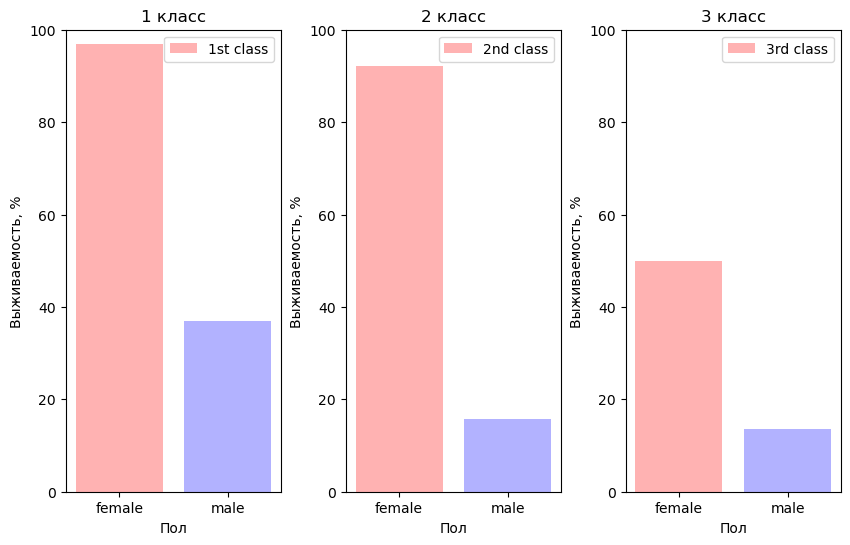

In [75]:
fig, ax = plt.subplots(1,3,figsize=(10, 6))

colors = ['red', 'blue']

ax[0].bar(class_data[class_data['Pclass'] == 1]['Sex'],class_data[class_data['Pclass'] == 1]['Survived']*100, alpha=0.3, label='1st class', color=colors)
ax[0].set_xlabel('Пол')
ax[0].set_ylabel('Выживаемость, %')
ax[0].set_title("1 класс")
ax[1].bar(class_data[class_data['Pclass'] == 2]['Sex'],class_data[class_data['Pclass'] == 2]['Survived']*100, alpha=0.3, label='2nd class', color=colors)
ax[1].set_xlabel('Пол')
ax[1].set_ylabel('Выживаемость, %')
ax[1].set_title("2 класс")
ax[2].bar(class_data[class_data['Pclass'] == 3]['Sex'],class_data[class_data['Pclass'] == 3]['Survived']*100, alpha=0.3, label='3rd class', color=colors)
ax[2].set_xlabel('Пол')
ax[2].set_ylabel('Выживаемость, %')
ax[2].set_title("3 класс")

ax[0].legend()
ax[1].legend()
ax[2].legend()


ax[0].set_ylim(0, 100)
ax[1].set_ylim(0, 100)
ax[2].set_ylim(0, 100)

plt.subplots_adjust(wspace=0.3)

plt.savefig('titanic_classes_an.png', dpi=300, bbox_inches='tight')

plt.show()

In [71]:
import os


In [72]:
os.getcwd()

'C:\\Users\\User'

In [74]:
new_dir = 'C:\\Users\\User\jupiter_dir'
os.chdir(new_dir)

# снова получаем текущую директорию
current_dir = os.getcwd()
print("Новая директория:", current_dir)

Новая директория: C:\Users\User\jupiter_dir
